# EEST Flowcharts

In [1]:
from pathlib import Path

from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.programming.language import Bash, Go, Python

output_formats = ["png"]  #, "svg"]
output_dir = Path("./")
# if not output_dir.exists():
#     output_dir.mkdir()

## Fill

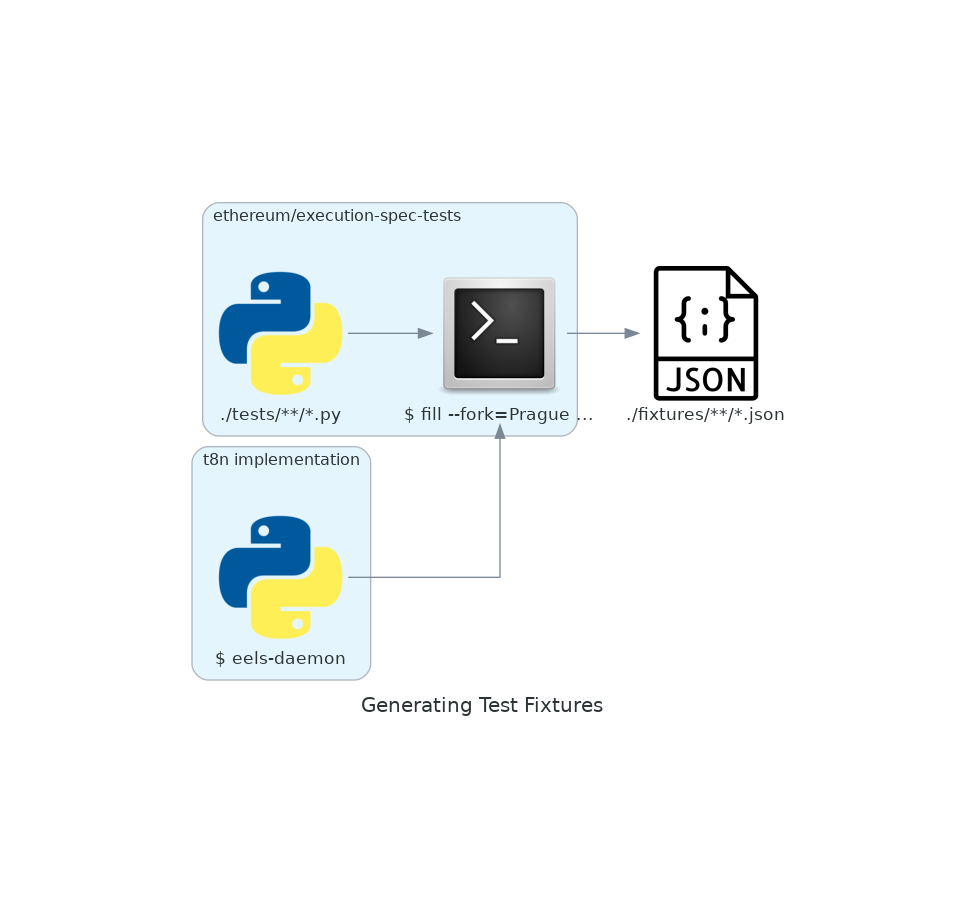

In [2]:
with Diagram("Generating Test Fixtures", show=False, outformat=output_formats, filename=output_dir / "fill") as fill_tests:

    fixtures = Custom("./fixtures/**/*.json", "./img/json.png")

    with Cluster("t8n implementation"):
        t8n_python = Python("$ eels-daemon")

    with Cluster("ethereum/execution-spec-tests"):
        test_source = Python("./tests/**/*.py")
        fill = Bash("$ fill --fork=Prague ...")

    test_source >> fill >> fixtures
    t8n_python >> fill
fill_tests

## Consume Direct

- Test formats: `state_test`, `blockchain_test`, `eof_test`
- Type: EVM module test
- Aim: Fast test execution against the EVM

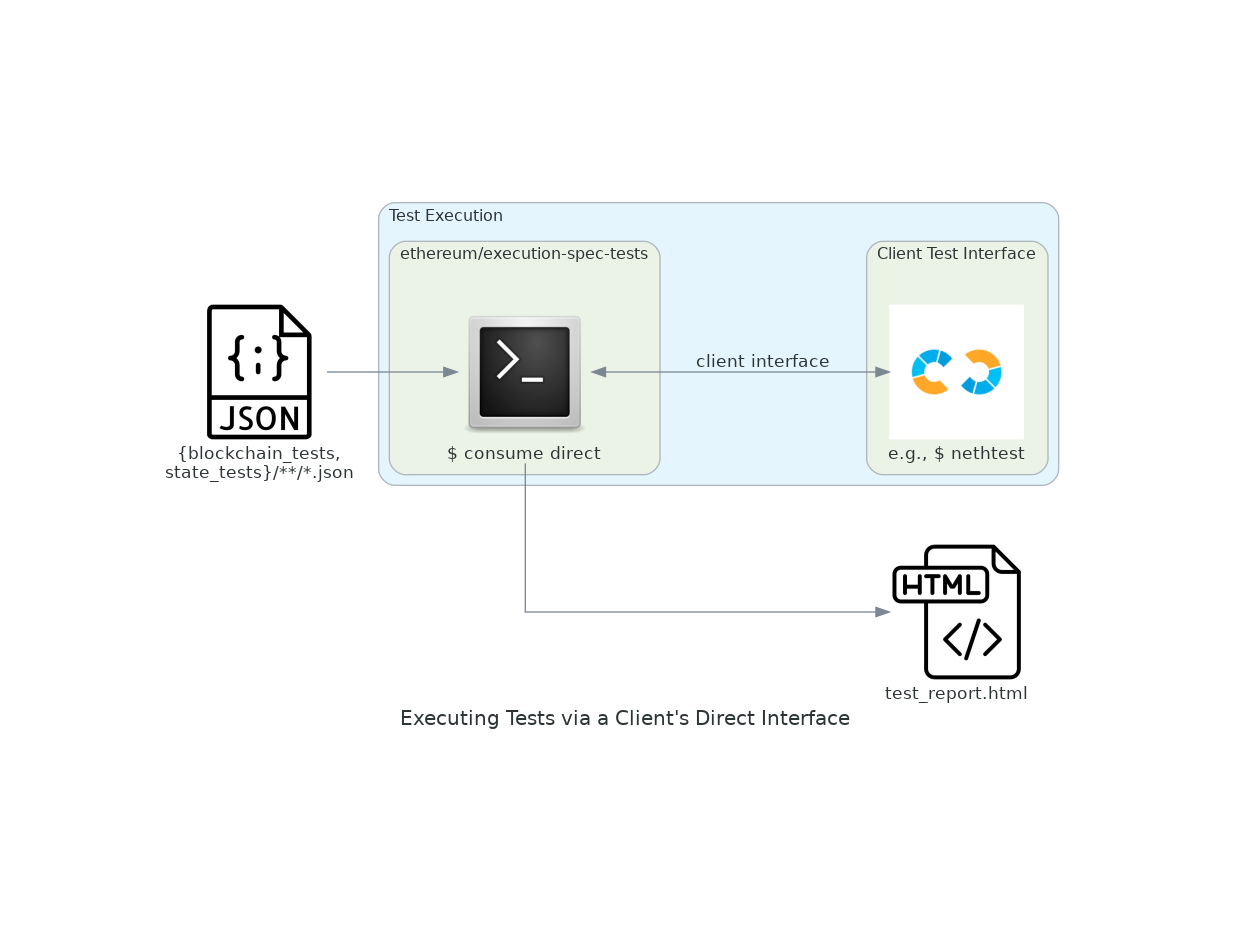

In [3]:
with Diagram(
    "Executing Tests via a Client's Direct Interface",
    show=False,
    outformat=output_formats,
    filename=output_dir / "consume_direct",
) as consume_direct:

    fixtures = Custom("{blockchain_tests,\nstate_tests}/**/*.json", "./img/json.png")
    with Cluster("Test Execution"):
        with Cluster("Client Test Interface"):
            client = Custom("e.g., $ nethtest", "./img/nethermind.png")
        with Cluster("ethereum/execution-spec-tests"):
            consume = Bash("$ consume direct")
    test_report = Custom("test_report.html", "./img/html.png")

    consume << Edge(label="client interface") >> client
    fixtures >> consume >> test_report
consume_direct

## Consume RLP

- Test format: `blockchain_test` JSON fixture
- Type: System test of fully instantiated client
- Aim: Tests the client's sync code path.

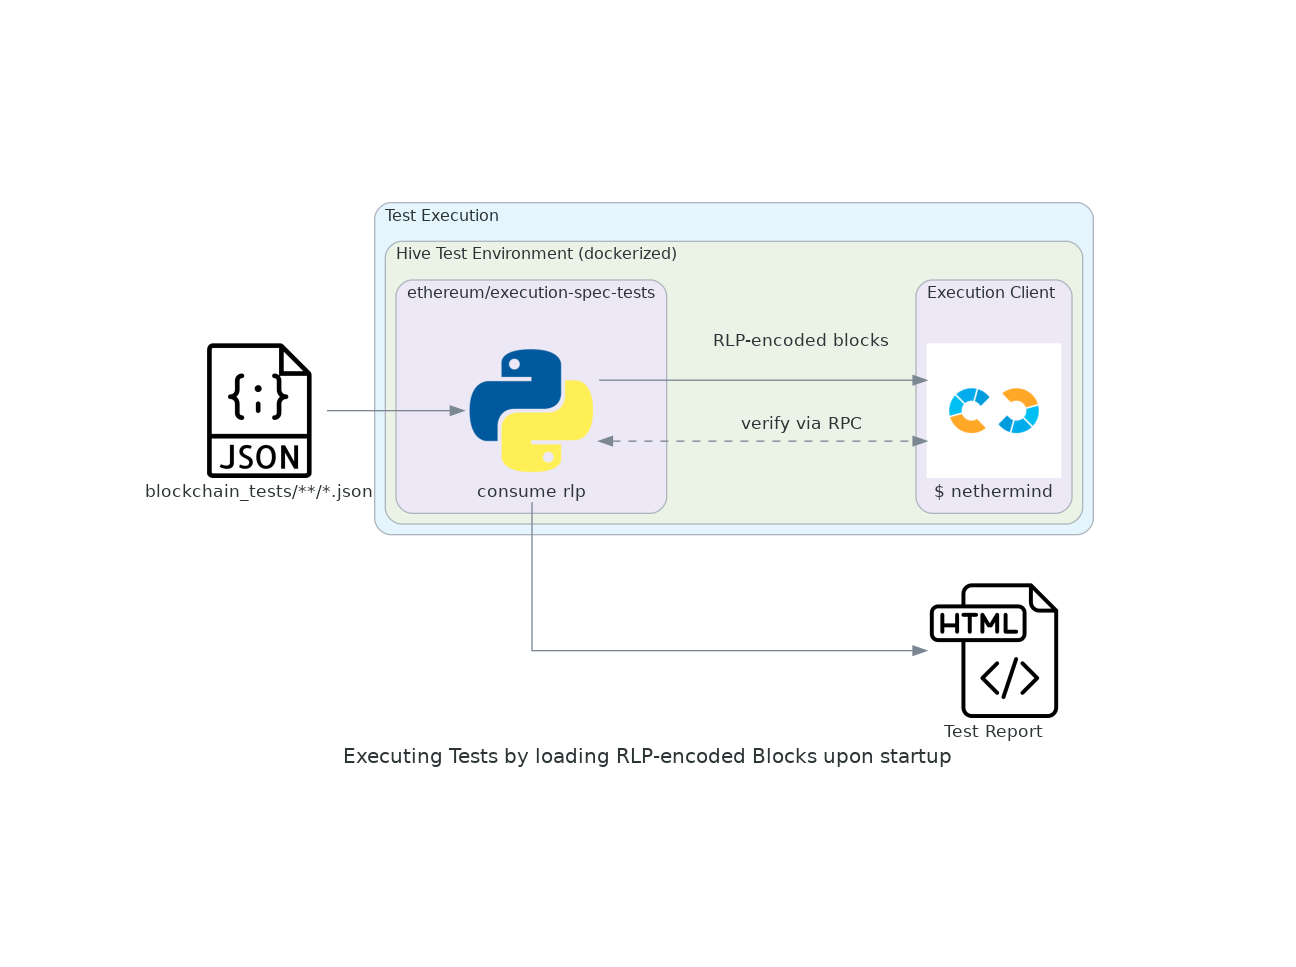

In [4]:
with Diagram(
    "Executing Tests by loading RLP-encoded Blocks upon startup",
    show=False,
    outformat=output_formats,
    filename=output_dir / "consume_rlp",
) as consume_rlp:

    fixtures = Custom("blockchain_tests/**/*.json", "./img/json.png")
    with Cluster("Test Execution"):
        with Cluster("Hive Test Environment (dockerized)"):
            with Cluster("ethereum/execution-spec-tests"):
                consume = Python("consume rlp")
            # with Cluster("Hive Orchestrator"):
            #     hiveproxy = Go("hiveproxy")
            with Cluster("Execution Client"):
                client = Custom("$ nethermind", "./img/nethermind.png")
    test_report = Custom("Test Report", "./img/html.png")

    consume << Edge(label="verify via RPC", style="dashed") >> client
    consume >> Edge(label="RLP-encoded blocks") >> client
    fixtures >> consume >> test_report
consume_rlp

## Consume Engine

- Test format: `blockchain_test_engine` JSON fixture
- Type: System test of fully instantiated client
- Aim: "Interop" testing; tests client block consumption via the Engine API.

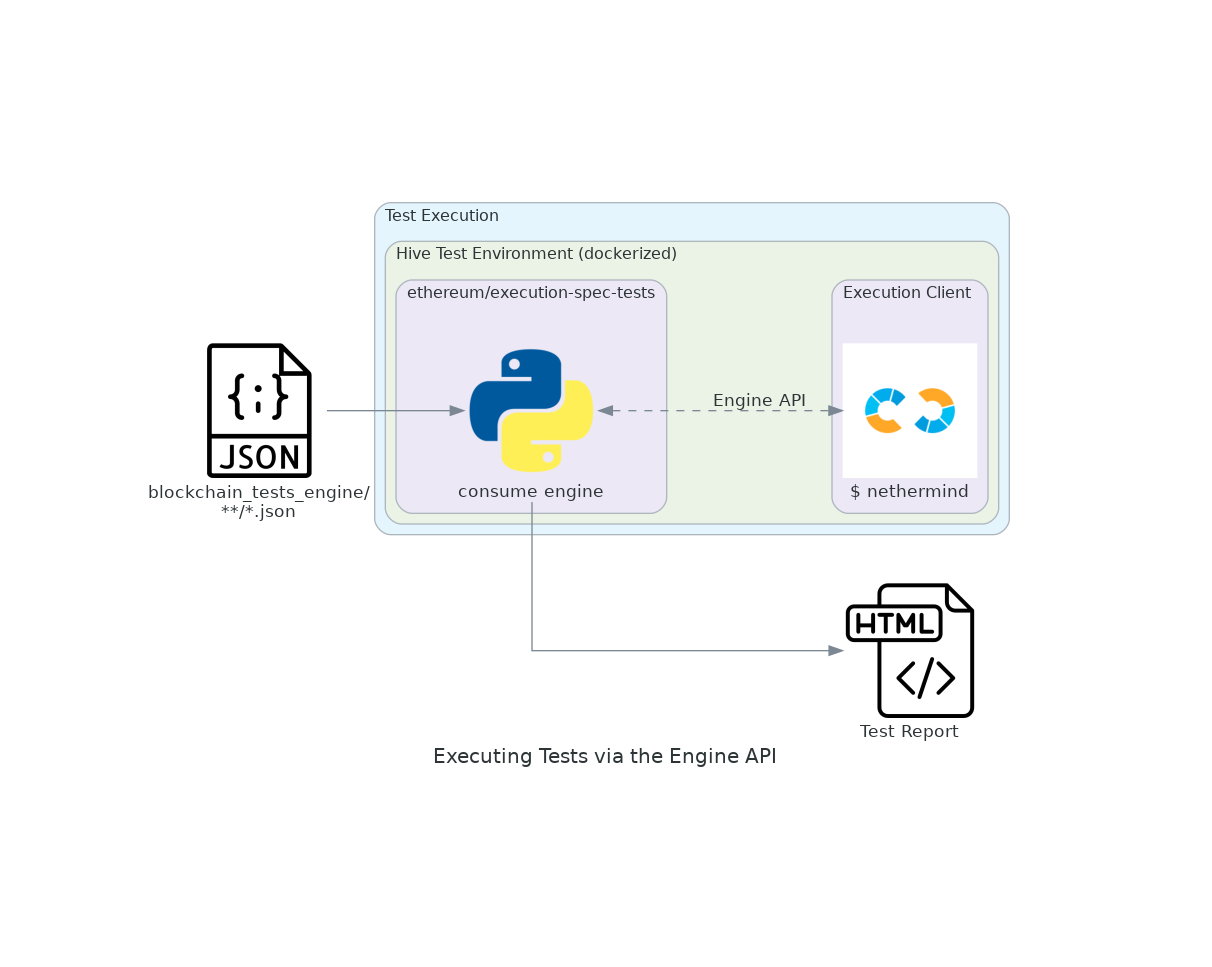

In [5]:
with Diagram(
    "Executing Tests via the Engine API",
    show=False,
    outformat=output_formats,
    filename=output_dir / "consume_engine",
) as consume_engine:

    fixtures = Custom("blockchain_tests_engine/\n**/*.json", "./img/json.png")
    with Cluster("Test Execution"):
        with Cluster("Hive Test Environment (dockerized)"):
            with Cluster("ethereum/execution-spec-tests"):
                consume = Python("consume engine")
            # with Cluster("Hive Orchestrator"):
            #     hiveproxy = Go("hiveproxy")
            with Cluster("Execution Client"):
                client = Custom("$ nethermind", "./img/nethermind.png")
    test_report = Custom("Test Report", "./img/html.png")

    consume << Edge(label="Engine API", style="dashed") >> client
    fixtures >> consume >> test_report
consume_engine

## Execute

- Test format: `state_test` (direct from Python; no `t8n` involved)
- Type: 
    - Production(-like) test of fully instantiated client on a live network
    - System test of fully instantiated client (Hive-mode)
- Aim: Test client block building and RPC endpoint

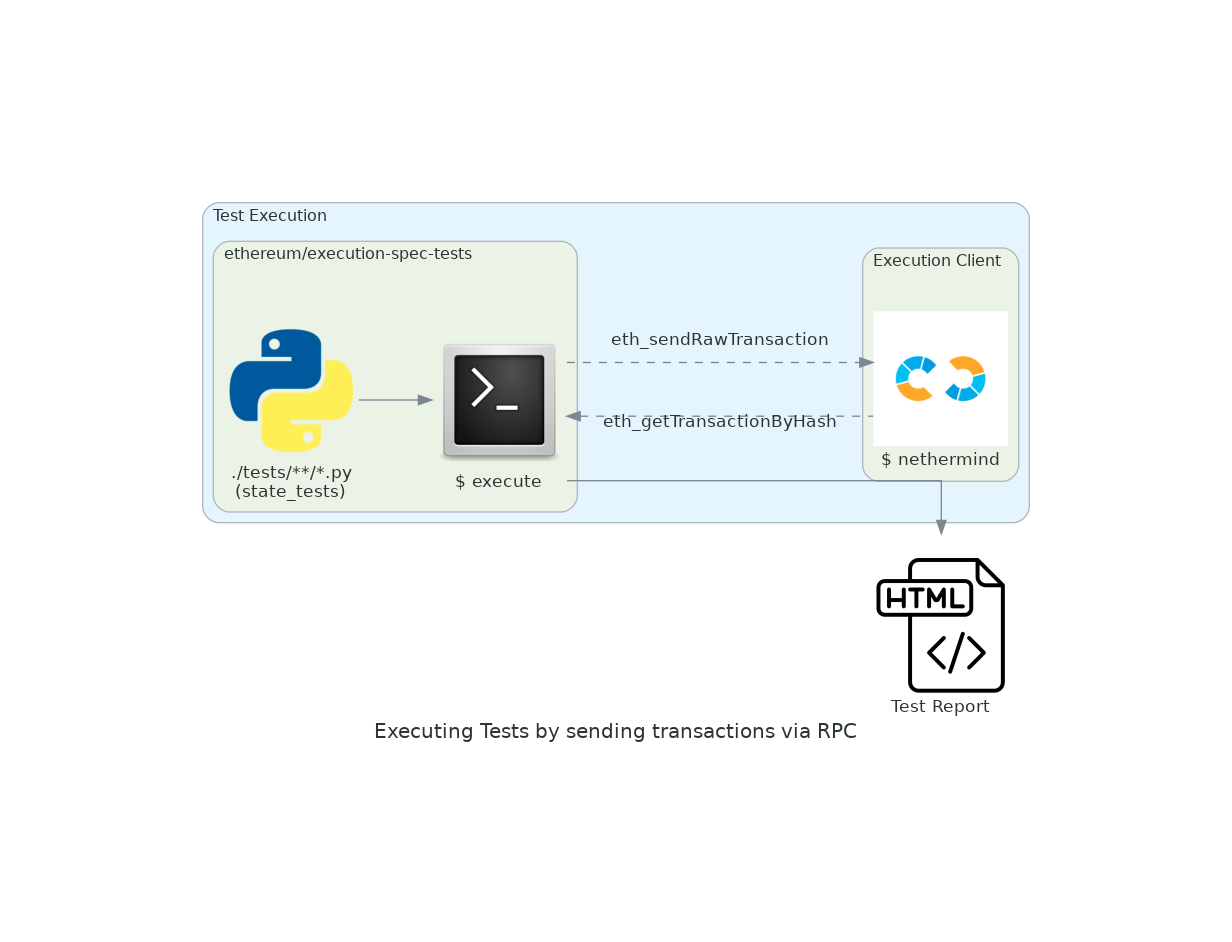

In [12]:
with Diagram(
    "Executing Tests by sending transactions via RPC",## (on a live network)",
    show=False,
    outformat=output_formats,
    filename=output_dir / "execute",
) as eest_execute:

    with Cluster("Test Execution"):
            with Cluster("ethereum/execution-spec-tests"):
                test_cases = Python("./tests/**/*.py\n(state_tests)")
                execute = Bash("$ execute")
            with Cluster("Execution Client"):
                client = Custom("$ nethermind", "./img/nethermind.png")
    test_report = Custom("Test Report", "./img/html.png")

    execute << Edge(label="eth_getTransactionByHash", style="dashed") << client
    execute >> Edge(label="eth_sendRawTransaction", style="dashed") >> client
    test_cases >> execute >> test_report
eest_execute